<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Устранение-артефактов" data-toc-modified-id="Устранение-артефактов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Устранение артефактов</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Основные-параметры-объектов" data-toc-modified-id="Основные-параметры-объектов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Основные параметры объектов</a></span></li><li><span><a href="#Скорость-продаж" data-toc-modified-id="Скорость-продаж-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Скорость продаж</a></span></li><li><span><a href="#Факторы-цены" data-toc-modified-id="Факторы-цены-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Факторы цены</a></span></li><li><span><a href="#Средняя-цена-за-квадратный-метр" data-toc-modified-id="Средняя-цена-за-квадратный-метр-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Средняя цена за квадратный метр</a></span></li><li><span><a href="#Цена-одного-километра-расстояния-до-центра" data-toc-modified-id="Цена-одного-километра-расстояния-до-центра-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Цена одного километра расстояния до центра</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

Имеются данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

*Главная цель проекта* — выявление закономерностей и особенностей рынка вторичной жилой недвижимости в Санкт-Петербурге.

*Задачи*:

* выполнить предобработку данных;
* изучить данные на предмет наличия в них особенностей и зависимостей.

*Исследование включает в себя следующие этапы*:

1. Первичный обзор данных


2. Предобработка данных:
    * обработка пропусков
    * изменение типов данных
    * обработка дубликатов
    * устранение артефактов
    

3. Введение дополнительных столбцов с расчётными данными


4. Исследовательский анализ данных:
    * исследование основных параметров объявлений
    * исследование скорости продаж (сроков размещения объявления)
    * исследование факторов, определяющих стоимость объектов
    * исследование цены одного квадратного метра в топ-10 населённых пунктов по числу объявлений
    * исследование цены одного километра расстояния до центра Петербурга

## Изучение данных из файла

Сохраним таблицу с данными объявлений о продаже квартир в переменную `real_estate`. Учтём, что в качестве разделителя используется не запятая, а табуляция. Перед тем, как вывести 5 первых строк на экран, на всякий случай снимем ограничение на количество выводимых столбцов.

In [1]:
import pandas as pd

#этот датасет я не буду выкладывать в открытый доступ
real_estate = pd.read_csv('...', sep='\t')
pd.set_option('display.max_columns', None)
real_estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Из условия известно:

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м),

`balcony` — число балконов,

`ceiling_height` — высота потолков (м),

`cityCenters_nearest` — расстояние до центра города (м),

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия),

`first_day_exposition` — дата публикации,

`floor` — этаж,

`floors_total` — всего этажей в доме,

`is_apartment` — апартаменты (булев тип),

`kitchen_area` — площадь кухни в квадратных метрах (м²),

`last_price` — цена на момент снятия с публикации,

`living_area` — жилая площадь в квадратных метрах (м²),

`locality_name` — название населённого пункта,

`open_plan` — свободная планировка (булев тип),

`parks_around3000` — число парков в радиусе 3 км,

`parks_nearest` — расстояние до ближайшего парка (м),

`ponds_around3000` — число водоёмов в радиусе 3 км,

`ponds_nearest` — расстояние до ближайшего водоёма (м),

`rooms` — число комнат,

`studio` — квартира-студия (булев тип),

`total_area` — площадь квартиры в квадратных метрах (м²),

`total_images` — число фотографий квартиры в объявлении.

Также известно, что все данные в датасете можно подразделить на два типа: добавленные пользователем и картографические. К первому типу относятся, например, площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

Посмотрим общую информацию о таблице:

In [2]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Также взглянем на статистическое описание данных:

In [3]:
real_estate.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Визуализируем распределение значений в столбцах таблицы:

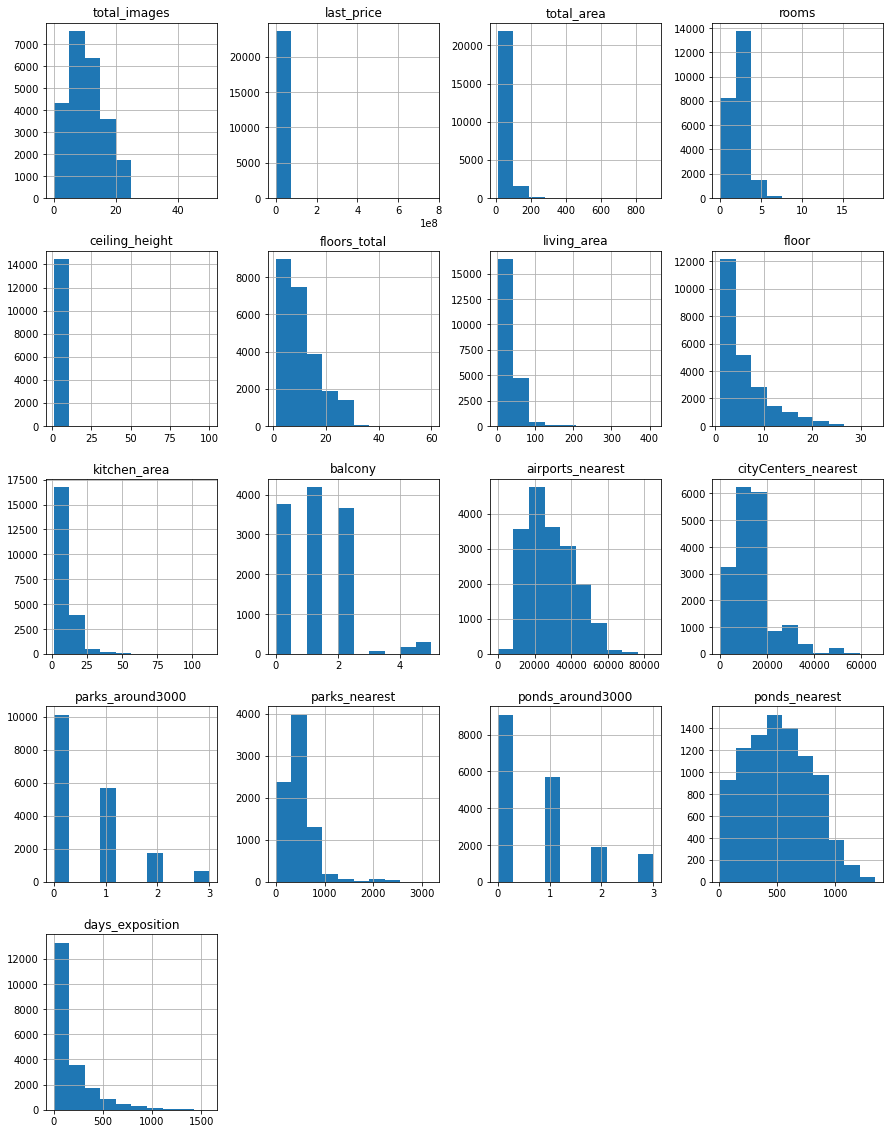

In [4]:
real_estate.hist(figsize=(15, 20));

**Промежуточные выводы**

Приведённые в таблице данные далеки от совершенства. Во всех столбцах, кроме `total_images`, `last_price`, `total_area`, `first_day_exposition`, `rooms`, `floor`, `studio` и `open_plan`, есть пропуски.

Также в данных явно имеются неправдоподобные значения. Особенно это легко отследить по строкам `max` и `min` в ячейке со статистическим описанием таблицы. Так, сложно себе представить квартиру с высотой потолков 1 метр или жилое здание с 60 этажами в Петербурге. С этими значениями нужно будет что-то делать.

В целом, однако, данные выглядят нормально:
* на каждой гистограмме присутствует по одному пику;
* значения, соответствуеющие пикам, ожидаемые;
* больших выбросов не наблюдается.

## Предобработка данных

### Обработка пропусков

<a id='omissions_categories'></a>
Используем три разные стратегии для обработки пропусков.

1. Пропуски, которые могут быть заполнены исходя из содержания столбца, в котором они появились, мы заполним.


2. Пропуски, которые заполнить нельзя и при этом число содержащих их строк сравнительно невелико (<5% от общего числа строк), мы удалим.


3. Пропуски, которые заполнить нельзя и число содержащих их строк велико, мы оставим без изменений.


**К первой категории пропусков относятся пропуски в столбцах:**

`ceiling_height` — здесь можно использовать медиану для заполнения пропусков (скорее всего, владельцы квартир не вносят данные о высоте потолков, потому что им они считают её «обычной», поэтому логично будет заменить пропуски «обычными» значениями; среднее мы не используем, так как в столбце явно присутствуют неправдоподобно большие значения);

`is_apartment` — здесь пропуски, вероятно, соответствуют значению `False` (полагаем, что те, кто продаёт апартаменты, не забудут отметить это в своём объявлении, а для всех остальных эта графа особого значения не имеет, поэтому вполне может быть ими пропущена);

`balcony` — здесь в качестве заполнителя можно использовать `0` (наверное, владельцы квартир без балконов даже не обращают внимания на графу "Количество балконов", а потому и не заполняют её; доля рассеянных владельцев, у которых балкон(ы) есть и они просто забыли указать, сколько их, вряд ли будет велика)

Заполним пропуски в указанных столбцах.

In [5]:
real_estate['ceiling_height'].fillna(
    real_estate['ceiling_height'].median(),
    inplace=True
)
real_estate['is_apartment'].fillna(False, inplace=True)
real_estate['balcony'].fillna(0.0, inplace=True)

Чтобы понять, пропуски из каких стобцов попадут во [вторую и третью категории](#omissions_categories), рассчитаем доли строк с пропусками для всех столбцов таблицы и выведем их на экран (в %). 

In [6]:
real_estate.apply(axis=0, func=lambda x: x.isna().sum() / len(real_estate) * 100)

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height           0.000000
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment             0.000000
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                  0.000000
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

Во вторую категорию попадают только пропуски в столбцах `floors_total` и `locality_name`. Откуда они взялись? Скорее всего, владельцы забыли заполнить эти графы. Или, может, не нашли соответствующего населённого пункта в выпадающем списке. 

Исключение строк с пропусками в этих столбцах не скажется на качестве данных негативно, поскольку таких пропусков немного. Удалим их.

In [7]:
real_estate = real_estate.dropna(subset=['floors_total', 'locality_name']).reset_index()

Проверим, успешно ли обработаны пропуски из первой и второй категорий.

In [8]:
for column in ['ceiling_height', 'is_apartment', 'balcony', 'floors_total', 'locality_name']:
    print(f'Количество пропусков в столбце {column}:', real_estate[column].isna().sum())

Количество пропусков в столбце ceiling_height: 0
Количество пропусков в столбце is_apartment: 0
Количество пропусков в столбце balcony: 0
Количество пропусков в столбце floors_total: 0
Количество пропусков в столбце locality_name: 0


Пропуски обработаны успешно.

Перейдём к пропускам из [третьей категории](#omissions_categories).

Их много, поэтому удалять содержащие их строки не самая лучшая идея. Это может привести к потере большого объёма важных данных.
Проанализируем эти пропуски и попробуем понять, откуда они взялись и можно ли с ними что-то сделать. Для этого визуализируем их при помощи хитмэпа из библиотеки `seaborn`. В левой части диаграммы будут отмечены пропуски в столбцах с данными, добавленными пользователем, а в правой — пропуски в столбцах с картографическими данными.

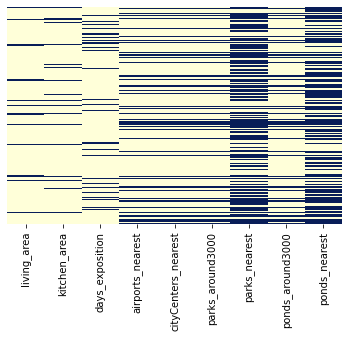

In [9]:
import seaborn as sns

sns.heatmap(
    real_estate[
        ['living_area', 'kitchen_area', 'days_exposition', 'airports_nearest', 'cityCenters_nearest',
         'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']].isna(),
    yticklabels=False, cbar=False, cmap='YlGnBu');

По этой диаграмме можно сделать следующие выводы:

1. Зачастую (но не всегда) пропуски в столбцах, в которых указывается жилая площадь и площадь кухни, связаны между собой. Видимо, дело в том, что люди, не знающие жилую площадь квартиры, обычно не знают и площадь кухни. Другая возможная причина возникновения пропусков в этих столбцах — некорректная обработка ввода (например, не обрабатываются числовые поля, в которых владелец указал также строковые символы (м²)). Впрочем, это уже маловероятно — скорее всего, дизайнеры объявления позаботились о том, чтобы не допустить таких проблем, раз их не возникало в другом столбце с площадью (`total_area`).


2. Распределение пропусков в столбце `days_exposition` не связано с данными в других столбцах. Они возникают в строках, соответствующих тем объявлениям, которые, по всей видимости, не были сняты на момент выгрузки.


3. Пропуски в столбцах, заполненных картографическими данными, явно связаны между собой. Пропуски в столбцах `airports_nearest`, `cityCenters_nearest`, `ponds_around3000` и `parks_around3000` попадают в одни и те же строки. В этих же строках оказываются пропущены данные по столбцам `ponds_nearest` и `parks_nearest`. При этом последние содержат больше пропусков. Попробуем найти причину возникновения пропусков в картографических данных.

Сначала выясним, почему пропусков в `ponds_nearest` и `parks_nearest` больше, чем в других столбцах. Посмотрим, каким значениям в других столбцах соответствуют такие пропуски. Начнём со столбца `ponds_nearest`:

In [10]:
real_estate[real_estate['ponds_nearest'].isna()].head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,False,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0


По выведенным строкам видно, что пропуски возникают в `ponds_nearest` и `parks_nearest` тогда, когда в `ponds_around3000` и `parks_around3000` соответственно оказывается значение `NaN` или `0`. Проверим это наблюдение:

In [11]:
print('Уникальные значения в столбце "ponds_around3000", соотвествующие пропуску в "ponds_nearest":',
      real_estate[real_estate['ponds_nearest'].isna()]['ponds_around3000'].unique())
print('Уникальные значения в столбце "parks_around3000", соотвествующие пропуску в "parks_nearest":',
      real_estate[real_estate['parks_nearest'].isna()]['parks_around3000'].unique())

Уникальные значения в столбце "ponds_around3000", соотвествующие пропуску в "ponds_nearest": [ 0. nan]
Уникальные значения в столбце "parks_around3000", соотвествующие пропуску в "parks_nearest": [ 0. nan]


Проверим, работает ли это в обратную сторону: гарантированно ли мы получим `NaN` в `ponds_nearest` или `parks_nearest`, если в `ponds_around3000` или `parks_around3000` соответственно будет `0`:

In [12]:
print('Уникальные значения в столбце "ponds_nearest", соотвествующие нулю в "ponds_around3000":')
print(real_estate.query('ponds_around3000 == 0.0')['ponds_nearest'].value_counts())
print()
print('Уникальные значения в столбце "parks_nearest", соотвествующие нулю в "parks_around3000":')
print(real_estate.query('parks_around3000 == 0.0')['parks_nearest'].value_counts())

Уникальные значения в столбце "ponds_nearest", соотвествующие нулю в "ponds_around3000":
Series([], Name: ponds_nearest, dtype: int64)

Уникальные значения в столбце "parks_nearest", соотвествующие нулю в "parks_around3000":
3190.0    2
3064.0    1
3013.0    1
Name: parks_nearest, dtype: int64


В целом работает.

<a id='parks_and_ponds'></a>
Видимо, дело в том, что в алгоритме оценки расстояния до ближайшего пруда или парка есть отсечка на максимальное расстояние (со значением в районе 3000 м, которое, возможно, когда-то менялось), на котором может находиться объект. Если оно превышено, то тогда алгоритм возвращает `NaN`. Из-за этого почти во всех случаях, когда в радиусе 3000 м не оказывается ни одного пруда или парка, в столбцах `ponds_around` или `parks_nearest` возникает пропуск.

Теперь попробуем выяснить, почему возникают остальные пропуски в картографических данных. Рассмотрим первые пять строк с пропусками в картографических данных:

In [13]:
real_estate[real_estate['airports_nearest'].isna()].head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.00,5,False,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,False,False,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,False,False,False,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0


Сразу бросается в глаза, что все населённые пункты, указанные в строках выше, — это не Петербург. Посмотрим, какую долю занимают строки, где в `locality_name` указан Петербург, среди всех строк с пропусками в картографических данных:

In [14]:
spb_share = (len(real_estate[
        (real_estate['airports_nearest'].isna())
        & (real_estate['locality_name'] == 'Санкт-Петербург')])
        / len(real_estate['airports_nearest'].isna()))
print('Доля строк с пропусками в картографических данных, в которых в качестве населённого пункта указан Санкт-Петербург:',
      spb_share * 100,'%')

Доля строк с пропусками в картографических данных, в которых в качестве населённого пункта указан Санкт-Петербург: 0.35646085295989816 %


Получается, подавляющее большинство пропусков в картографических данных связаны со сбоями в алгоритме расчёта расстояния до соответствующего объекта, если этот объект находится не в Петербурге. Что касается пропусков в данных, относящихся к Петербургу, то тут сложнее определить их источник. Возможно, все они связаны с объявляениями о недвижимости в удалённых частях города, и поэтому алгоритм подспудно рассматривает их как находищиеся в других населённых пунктах.

К сожалению, даже составив представление о возможных причинах пропусков [третьей категории](#omissions_categories), мы не можем устранить их, не исказив данные. Поэтому оставим их как есть. На этом обработка пропусков завершена.

### Изменение типов данных

Ещё раз просмотрим информацию о типах данных столбцов датафрейма `real_estate`:

In [15]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 23565 non-null  int64  
 1   total_images          23565 non-null  int64  
 2   last_price            23565 non-null  float64
 3   total_area            23565 non-null  float64
 4   first_day_exposition  23565 non-null  object 
 5   rooms                 23565 non-null  int64  
 6   ceiling_height        23565 non-null  float64
 7   floors_total          23565 non-null  float64
 8   living_area           21700 non-null  float64
 9   floor                 23565 non-null  int64  
 10  is_apartment          23565 non-null  bool   
 11  studio                23565 non-null  bool   
 12  open_plan             23565 non-null  bool   
 13  kitchen_area          21343 non-null  float64
 14  balcony               23565 non-null  float64
 15  locality_name      

Изменить типы данных стоит в следующих столбцах:

* `first_day_exposition` — с типа `str` на тип `datetime`,
* `floors_total` — с типа `float` на тип `integer`,
* `balcony` — с типа `float` на тип `integer`,

Ещё мы округлим значения в `days_exposition` до 0 знаков после запятой.

Также было бы неплохо преобразовать в целочисленный формат данные в столбцах `parks_around3000` и `ponds_around3000`, однако это сделать не удастся, поскольку эти столбцы содержат большое количество пропусков, формат которых при попытке преобразования в `integer` не изменится. Ещё могло бы быть удобно иметь столбец `days_exposition` в формате `timedelta`, но так как в проекте нет заданий, связанных с расчётом дня снятия объявлений, в этом необходимости.

Изменение типов данных в данном случае объясняется соображениями удобства и/или экономии памяти.

Сделаем это и проверим результат:

In [16]:
real_estate['first_day_exposition'] = pd.to_datetime(
    real_estate['first_day_exposition'],
    format='%Y-%m-%dT%H:%M:%S'
)
real_estate['floors_total'] = real_estate['floors_total'].astype('int')
real_estate['balcony'] = real_estate['balcony'].astype('int')

real_estate['days_exposition'] = real_estate['days_exposition'].apply(lambda x: round(x, 0))

display(real_estate.head())
real_estate.info()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 23565 non-null  int64         
 1   total_images          23565 non-null  int64         
 2   last_price            23565 non-null  float64       
 3   total_area            23565 non-null  float64       
 4   first_day_exposition  23565 non-null  datetime64[ns]
 5   rooms                 23565 non-null  int64         
 6   ceiling_height        23565 non-null  float64       
 7   floors_total          23565 non-null  int64         
 8   living_area           21700 non-null  float64       
 9   floor                 23565 non-null  int64         
 10  is_apartment          23565 non-null  bool          
 11  studio                23565 non-null  bool          
 12  open_plan             23565 non-null  bool          
 13  kitchen_area    

Преобразование прошло успешно.

### Обработка дубликатов

Поищем неявные дубликаты в `real_estate`. Таковые можно найти только в строковых столбцах, а он всего один — это `locality_name`. Внимательно просмотрим список уникальных значений, отсортированный в лексикографическом порядке:

In [17]:
display(sorted(real_estate['locality_name'].unique()))

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

Найденные дубликаты:

* названия, содержащие букву «ё» (например, «городской поселок/посёлок Янино-1»);
* названия, содержащие словосочетания «поселок при железнодорожной станции» / «поселок станции» (понятия поселок при железнодорожной станции в принципе [нет](https://msu.lenobl.ru/media/content/docs/188/2_-_soderzhanie.pdf), это то же самое, что и посёлок при станции);
* названия, содержащие словосочетания «городской поселок» / «поселок городского типа» (это [одно и то же](https://docs.cntd.ru/document/891832035)).

Кроме того, замечены населённые пункты, названия которых отличаются только типом (например «Мурино» и «поселок Мурино»). Необходимо выявить все такие «подозрительные» населённые пункты и проверить, не являются ли они неявными дубликатами. Но сначала разберёмся с очевидными неявными дубликами из списка выше.

In [18]:
real_estate['locality_name'] = real_estate['locality_name'].replace(regex={'ё': 'е'}) #сначала меняем "ё" на "е", 
                                                                        #т.к. это влияет на следующие замены                                                                                  
real_estate['locality_name'] = (real_estate['locality_name'].replace(regex={
        'городской поселок': 'поселок городского типа',
        'поселок при железнодорожной станции': 'поселок станции'}))

print('Уникальные значения столбца locality_name:')
display(sorted(real_estate['locality_name'].unique()))

Уникальные значения столбца locality_name:


['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня Глинка',
 '

Очевидные неявные дубликаты исключены. Займёмся неочевидными. Для этого составим список `locality_names_doubled`, в который войдут названия, встречающиеся в наименованиях сразу нескольких населённых пунктов. Ожидаем, что повторяющихся названий относительно мало, поэтому не будем усложнять код и смиримся с тем, что в список попадут части нескольких заведомо неодинаковых названий (например, в нём окажется название «Бор», которое является частью названий «Сосновый Бор», «Красный Бор» и «Зеленый Бор»). Поскольку таких случаев немного, времени на поиск более оптимального алгоритма уйдёт больше, чем на ручной перебор.     

In [19]:
locality_names_all = []
locality_names_doubled = []

for full_name in real_estate['locality_name'].unique():
    name = full_name.split(' ')[-1]
    if name in locality_names_all:
        if name not in locality_names_doubled:
            locality_names_doubled.append(name)
    else:
        locality_names_all.append(name)
        
print('Повторяющиеся названия населённых пунктов:')
display(locality_names_doubled)

Повторяющиеся названия населённых пунктов:


['Мурино',
 'Бор',
 'Кудрово',
 'Павлово',
 'Федоровское',
 'Ропша',
 'Колпаны',
 'Рахья',
 'Бегуницы',
 'Рябово',
 'Никольское',
 'Ладога',
 'Щеглово',
 'Горка',
 'Любань',
 'Зимитицы',
 'Гарболово',
 'Громово',
 'Калитино',
 'Приладожский',
 'Рабитицы',
 'Романовка',
 'Лесное']

Теперь, вооружившись [справочником по административно-территориальному делению Ленинградской области на 2017 год](https://msu.lenobl.ru/media/content/docs/188/2_-_soderzhanie.pdf) и не забывая в необходимых случаях обращаться к информации из открытых источников, мы можем просмотреть информацию по каждому из повторяющихся названий и найти настоящие неявные дубликаты.

В результате выяснилось, что к неявным дубликатам относятся только четыре наименования: 

* «Мурино» / «поселок Мурино» — стал городом в 2019 году;
* «Кудрово» / «деревня Кудрово» — стала городом в 2018 году;
* «поселок городского типа Федоровское» / «деревня Федоровское» — стала пгт в 2017 году;
* «деревня Гарболово» / «посёлок Гарболово» — отдельного посёлка Гарболово, отличного от нынешней деревни, нет и не было; вероятно, где-то в районе 2017 года посёлок переименовали в деревню.

Устраним эти неявные дубликаты. Оставим только более новые названия.

*Кстати, в описании задания проекта было сказано, что «поселок Рябово» и «поселок городского типа Рябово» — это одно и то же. По всей видимости, это ошибка: согласно справочнику, существует и поселок Рябово, и пгт Рябово, причём они даже находятся в разных частях Ленобласти: один в Выборгском районе, а другой в Тосненском. Судя по данным официальных источников, оба населённых пункта до сих пор существуют ([раз](https://primorsk.vbglenobl.ru/o-poselenii/istoricheskaya-spravka), [два](http://www.adm-ryabovo.ru/)).*

In [20]:
real_estate['locality_name'] = (real_estate['locality_name'].replace(to_replace={
        'поселок Мурино': 'Мурино',
        'деревня Кудрово': 'Кудрово',
        'деревня Федоровское': 'поселок городского типа Федоровское',
        'поселок Гарболово': 'деревня Гарболово'}))

removed_names = ['поселок Мурино', 'деревня Кудрово', 'деревня Федоровское', 'поселок Гарболово']

if len(real_estate.query('locality_name in @removed_names')) == 0:
    print('Неочевидные неявные дубликаты устранены.')
else:
    print('Неочевидные неявные дубликаты остались!')

Неочевидные неявные дубликаты устранены.


На всякий случай проверим, не появилось ли явных дубликатов в результате устранения неявных:

In [21]:
print('Количество явных дубликатов в датафрейме:', real_estate.duplicated().sum())

Количество явных дубликатов в датафрейме: 0


Обработка дубликатов завершена.

### Устранение артефактов

Ещё раз просмотрим базовую статистику по столбцам:

In [22]:
real_estate.describe()

,index,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,20394.000000
mean,11846.826183,9.878421,6.540058e+06,60.322824,2.070656,2.724530,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.769499,518.289509,180.741395
std,6842.594114,5.681156,1.091093e+07,35.657060,1.078591,0.991026,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.938669,278.009558,219.732782
min,0.000000,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,5921.000000,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,11850.000000,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,17774.000000,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,23698.000000,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<a id='suspicious_values'></a>

Сомнения вызывают крайние значения в следующих столбцах:

* `ceiling_height` — потолки высотой 1 м и 100 м?
* `floors_total` — этажность в 60 этажей у жилого здания?
* `airports_nearest` — минимальное расстояние в 0 м?

Несколько подозрительно выглядят также минимальные значения в столбцах `total_area`, `rooms`, `living_area` и `kitchen_area`, однако в принципе можно представить крошечные студии или однокомнатные квартиры с такими характеристиками (вот [реальный пример](https://moika78.ru/news/2019-01-14/175808-studiya-v-12-kvadratov-najdena-samaya-malenkaya-kvartira-peterburga/)).

Начнём с высоты потолков. Построим две диаграммы распределения высот*. На первый диаграмме представим все значения, на второй диаграмме — значения в диапазоне от 0 до 10 м. На оси х можно разместить любой параметр — в данном случае это не имеет значения. Пусть это будет значение столбца `index`.

**Мы используем диаграммы распределения, а не «ящик с усами», т.к. минимальное значение высоты потолка неправдоподобно и неизвестно, сколько ещё значений находится в диапазоне ниже нормального. В то же время на диаграмме «ящик с усами» такие значения точно попадут в зону нижнего «уса» и оценить их количество будет сложно. К тому же в случае с высотой потолка нормальные значения известны, и необходимости в статистической оценке их нормальности нет*. 

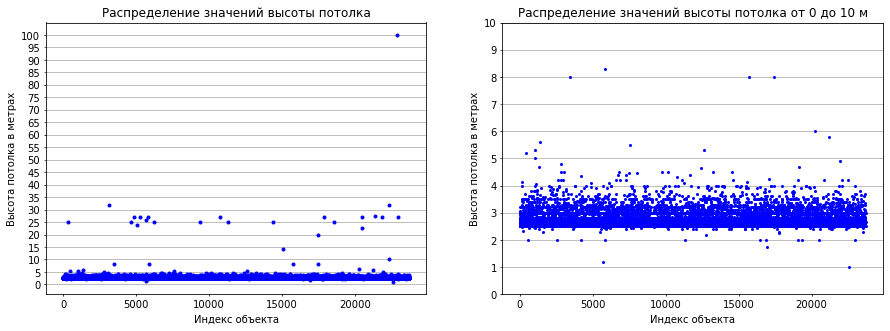

In [23]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax1.yaxis.set_minor_locator(AutoMinorLocator(4))
ax1.yaxis.set_minor_formatter("{x:.0f}")
ax1.tick_params(which='both', length=2)
ax1.grid(True, which='both', axis='y')
ax1.set_title('Распределение значений высоты потолка')
ax1.set_xlabel('Индекс объекта')
ax1.set_ylabel('Высота потолка в метрах')
ax1.plot(real_estate['index'], real_estate['ceiling_height'], 'bo', markersize=3)

ax2.set_ylim(0, 10)
ax2.yaxis.set_minor_locator(AutoMinorLocator(2))
ax2.yaxis.set_minor_formatter("{x:.0f}")
ax2.tick_params(which='both', length=2)
ax2.set_xlabel('Индекс объекта')
ax2.set_ylabel('Высота потолка в метрах')
ax2.grid(True, which='both', axis='y')
ax2.set_title('Распределение значений высоты потолка от 0 до 10 м')
ax2.plot(real_estate['index'], real_estate['ceiling_height'], 'bo', markersize=2);

Анализируя эти диаграммы, можно сделать следующие выводы:

1. Подавляющее большинство значений высоты потолка «нормальные», т.е. попадают в диапазон от 2 до 4 м.


2. Часть значений выглядит довольно необычно, но тоже в пределах нормы. Так, потолок высотой от 5 до 15 м — это, конечно, много, но для пентхауса или старинного особняка в принципе возможно.


3. Значения высоты в диапазоне от 15 до 35 м выглядят уже неправдоподобно. Однако тот факт, что они формируют более или менее определённую полосу на первой диаграмме, можно предположить, что их появление связано с ошибкой в использовании десятичного разделителя. Вполне возможно, что некоторые владельцы по ошибке не поставили запятую или сдвинули её вправо, и вместо 2,7 метров получилось 27 метров. Такие значения мы исправим, домножив на 0,1.


4. Значения высоты менее 2 м и более 35 м (такое значение только одно — 100 м) похожи на неисправимые ошибки. К счастью, таких высот совсем немного, и мы можем безболезненно удалить их.

Избавимся от артефактов в столбце `ceiling_height` и сразу проверим результат:

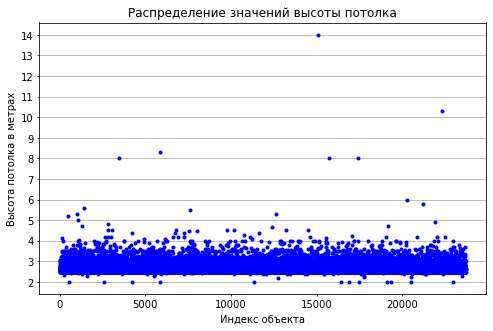

In [24]:
real_estate['ceiling_height'].where(
    (real_estate['ceiling_height'] < 15) | (real_estate['ceiling_height'] > 35),
    real_estate['ceiling_height'] * 0.1,
    inplace=True)

real_estate.drop(
    labels=real_estate.query('ceiling_height < 2 or ceiling_height > 15').index.tolist(),
    axis=0,
    inplace=True)

fig, ax1 = plt.subplots(figsize=(8,5))

ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_formatter("{x:.0f}")
ax1.tick_params(which='both', length=2)
ax1.grid(True, which='both', axis='y')
ax1.set_title('Распределение значений высоты потолка')
ax1.set_xlabel('Индекс объекта')
ax1.set_ylabel('Высота потолка в метрах')
ax1.plot(real_estate['index'], real_estate['ceiling_height'], 'bo', markersize=3);

Артефакты в столбце `ceiling_height` устранены успешно.

Рассмотрим необычные значения в столбце `floors_total`. Здесь удобнее может оказаться диаграмма «ящик с усами», поскольку в данном случае минимальное значение (1 этаж) вполне правдоподобно и тот факт, что оно покрывается межквартильным размахом, умноженным на 1,5, никак не помешает анализу.

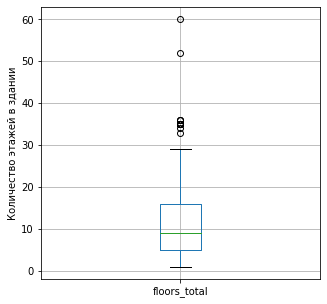

In [25]:
real_estate.boxplot('floors_total', figsize=(5,5))
plt.ylabel('Количество этажей в здании')
plt.show();

Подозрения внушают значения больше 37 (именно [такова](https://spbhomes.ru/science/samye-vysokie-zdaniya-v-sankt-peterburge/) максимальная этажность жилого здания в Петербурге). Удалим их и проверим результат:

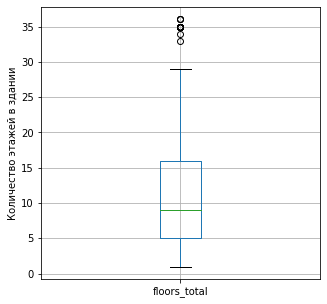

In [26]:
real_estate.drop(labels=real_estate.query('floors_total > 37').index.tolist(),
    axis=0,
    inplace=True)

real_estate.boxplot('floors_total', figsize=(5,5))
plt.ylabel('Количество этажей в здании')
plt.show();

Артефакты в столбце `floors_total` устранены.

Теперь разберёмся с аномалиями в столбце `airports_nearest`. Посмотрим, много ли объектов находятся на расстоянии менее 1 км до аэропорта.

In [27]:
print('Количество объявлений об объектах, находящихся на расстоянии менее 1 км от аэропорта: ',
      len(real_estate.query('airports_nearest < 1000')))

Количество объявлений об объектах, находящихся на расстоянии менее 1 км от аэропорта:  1


Видимо, это одно объявление — результат какого-то сбоя при расчёте расстояния до аэропорта. Удалим его и проверим результат.

In [28]:
real_estate.drop(
    labels=real_estate.query('airports_nearest < 1000').index.tolist(),
    axis=0,
    inplace=True)

print('Количество объявлений об объектах, находящихся на расстоянии менее 1 км от аэропорта: ',
      len(real_estate.query('airports_nearest < 1000')))

Количество объявлений об объектах, находящихся на расстоянии менее 1 км от аэропорта:  0


На этом обработка артефактов завершена.

**Промежуточные выводы**

В ходе предобработки мы:

* устранили часть пропусков, удалив их или заполнив; значительное количество пропусков при этом осталось, поскольку исключить их невозможно без снижения качества данных;

* изменили типы данных в трёх столбцах для удобства дальнейшей работы;

* устранили неявные дубликаты в столбце `locality_name`;

* устранили небольшое количество артефактов в столбцах `ceiling_height`, `floors_total` и `airports_nearest`.

## Расчёты и добавление результатов в таблицу

В соответствии с заданием проекта в таблицу нужно добавить столбцы со следующим данными:

* цена одного квадратного метра — `square_meter_price`;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее) — `exposition_since_day_week`;
* месяц публикации объявления — `exposition_since_month`;
* год публикации объявления — `exposition_since_year`;
* тип этажа квартиры (значения — «‎первый», «последний», «другой») — `floor_type`;
* расстояние до центра города в километрах (в км и округлённое до целых значений) — `cityCenters_nearest_km`.

Также для удобства введём столбец `last_price_mln`, в котором цена будет представлена в миллионах рублей.

Проведём необходимые операции. Столбец с типом этажа квартиры внесём отдельно.

In [29]:
real_estate['square_meter_price'] = real_estate['last_price'] / real_estate['total_area']

real_estate['exposition_since_day_week'] = real_estate['first_day_exposition'].dt.weekday
real_estate['exposition_since_month'] = real_estate['first_day_exposition'].dt.month
real_estate['exposition_since_year'] = real_estate['first_day_exposition'].dt.year

real_estate['cityCenters_nearest_km'] = round(real_estate['cityCenters_nearest'] / 1000)

real_estate['last_price_mln'] = real_estate['last_price'] / 1000000

Для категоризации этажей напишем функцию `floor_type` и на всякий случай проверим её на тестовом датафрейме.

In [30]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

test_df = pd.DataFrame({'floor': [3, 1, 5, 1],
                       'floors_total': [4, 2, 5, 1]})
test_df['floor_type'] = test_df.apply(floor_type, axis=1)

test_df

,floor,floors_total,floor_type
0,3,4,другой
1,1,2,первый
2,5,5,последний
3,1,1,первый


Функция работает корректно, можно применять её к `real_estate`. Сразу же посмотрим результат добавления новых столбцов.

In [31]:
real_estate['floor_type'] = real_estate.apply(floor_type, axis=1)

real_estate.head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,exposition_since_day_week,exposition_since_month,exposition_since_year,cityCenters_nearest_km,last_price_mln,floor_type
0,0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,16.0,13.000,другой
1,1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,19.0,3.350,первый
2,2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,14.0,5.196,другой
3,3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,7.0,64.900,другой
4,4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,8.0,10.000,другой


Добавление столбцов прошло успешно.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Этот раздел выполнен качественно
</div>

## Исследовательский анализ данных

### Основные параметры объектов

По заданию необходимо изучить следующие параметры:

* общая площадь — `total_area`;
* жилая площадь — `living_area`;
* площадь кухни — `kitchen_area`;
* цена объекта — `last_price`;
* количество комнат — `rooms`;
* высота потолков — `ceiling_height`;
* этаж квартиры — `floor`;
* тип этажа квартиры («первый», «последний», «другой») — `floor_type`;
* общее количество этажей в доме — `floors_total`;
* расстояние до центра города в метрах — `cityCenters_nearest`;
* расстояние до ближайшего аэропорта — `airports_nearest`;
* расстояние до ближайшего парка — `parks_nearest`;
* день публикации объявления — `exposition_since_day_week`;
* месяц публикации объявления — `exposition_since_month`.

Начнём с площадей. Построим гистограммы по столбцам `total_area`, `living_area` и `total_area`:

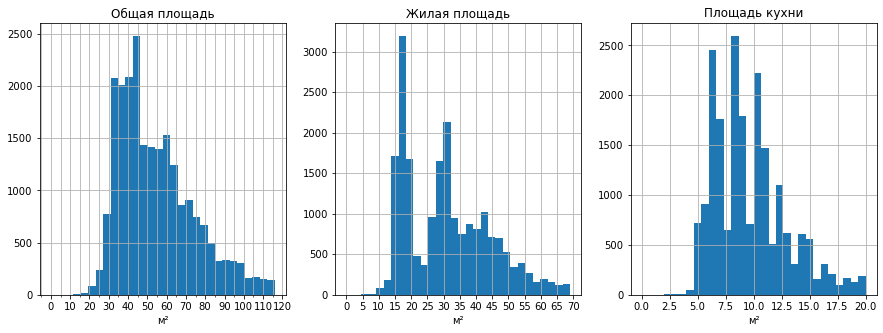

In [32]:
from matplotlib.ticker import MultipleLocator

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

ax1.xaxis.set_major_locator(MultipleLocator(10))
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.grid(True, which='both')
ax1.set_title('Общая площадь')
ax1.set_xlabel('м²')
ax1.hist(real_estate['total_area'],
         bins=30,
         range=(0, real_estate['total_area'].quantile(0.95)));

ax2.xaxis.set_major_locator(MultipleLocator(5))
ax2.grid(True, which='both')
ax2.set_title('Жилая площадь')
ax2.set_xlabel('м²')
ax2.hist(real_estate['living_area'],
         bins=30,
         range=(0, real_estate['living_area'].quantile(0.95)));

ax3.xaxis.set_major_locator(MultipleLocator(2.5))
ax3.grid(True)
ax3.set_title('Площадь кухни')
ax3.set_xlabel('м²')
ax3.hist(real_estate['kitchen_area'],
         bins=30,
         range=(0, real_estate['kitchen_area'].quantile(0.95)));

По этим гистограммам можно сделать следующие выводы:

*Общая площадь* (`total_area`) — площадь основной массы квартир попадает в диапазон от 30 до 75 м². Это вполне ожидаемое распределение для городского жилья. Небольшой пик, завершающий плато от 45 до 60 м², соответствует, вероятно, наиболее распространённому значению площади трёхкомнатных квартир. А основной пик — это, видимо, наиболее часто встречающаяся площадь двухкомнатных квартир.

*Жилая площадь* `(living_area`) — жилая площадь большинства квартир составляет от 15 до 45 м², что опять же ожидаемо. На гистограмме видны два пика: первый, по всей видимости, сформирован квартирами-студиями и однушками, а во второй попадают двушки (как будто бы есть ещё третий небольшой пик, который мы бы связали с трёшками). Наличие провала между ними, должно быть, связано с тем, что площадь жилой комнаты не может быть менее 8 м². Это добавляет распределению площадей некоторую степень дискретности: непрерывность в данном случае может обеспечиваться лишь за счёт относительно бо́льшей площади жилой комнаты в однушках и студиях.

*Площадь кухни* (`kitchen_area`) — распределение площадей кухни выглядит правдоподобно: большая часть значений находится в диапазоне от 6 до 12 м². Наличие на гистограмме большого количества пиков связано главным образом с тем, что вариативность значений площади кухни относительно мала, а число корзин на гистограмме, наоборот, относительно велико, так что группы типичных значений видны очень отчётливо.  

Построим гистограммы для столбцов `last_price`, `rooms` и `ceiling_height`:

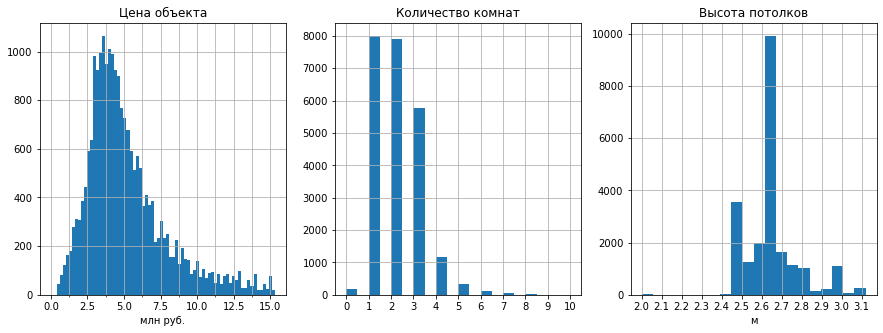

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.grid(True, which='both')
ax1.set_title('Цена объекта')
ax1.set_xlabel('млн руб.')
ax1.hist(real_estate['last_price_mln'],
         bins='auto',
         range=(0, real_estate['last_price_mln'].quantile(0.95)));

ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.grid(True)
ax2.set_title('Количество комнат')
ax2.hist(real_estate['rooms'],
         bins=20,
         range=(0, 10));

ax3.xaxis.set_major_locator(MultipleLocator(0.1))
ax3.grid(True)
ax3.set_title('Высота потолков')
ax3.set_xlabel('м')
ax3.hist(real_estate['ceiling_height'],
         bins=20,
         range=(2, real_estate['ceiling_height'].quantile(0.95)));

*Цена* (`last_price`) — значения цены объектов распределены нормально. Основная масса значений лежит в диапазоне от 2 до 6,5 млн рублей, самое частое значение — около 3,5—4 млн. "Хвост" у распределения довольно длинный, что, впрочем, неудивительно: ведь речь идёт не о физической характеристике, а о довольно-таки эфимерной цене.

*Количество комнат* (`rooms`) — большинство квартир — это однушки и двушки, много также трёшек. Распределение количества комнат в целом соответствует выдвинутым нами выше гипотезам о происхождении пиков на гистограммах площадей квартир.

*Высота потолков* (`ceiling_height`) — на графике высоты заметны два относительно высоких пика и один невысокий. Пик в районе 2,4–2,5 м [можно связать](http://propotoloks.ru/vysota-potolka-v-hrushhevke-standarty-po-tipam-domov/#i) с квартирами, находящимися в постройках хрущёвской эпохи. Второй пик между 2,6 и 2,7 м — это более поздняя застройка («брежневки» и современное бюджетное строительство). Третий, небольшой пик — это, скорее всего, «сталинки», а также современное строительство классом повыше «эконома». Доходные дома XIX века вряд ли самостоятельно представлены на гистограмме, поскольку в них высота потолка обычно разная на разных этажах.

Настал черёд гистограмм по столбцам `floor`, `floor_type` и `floors_total`.

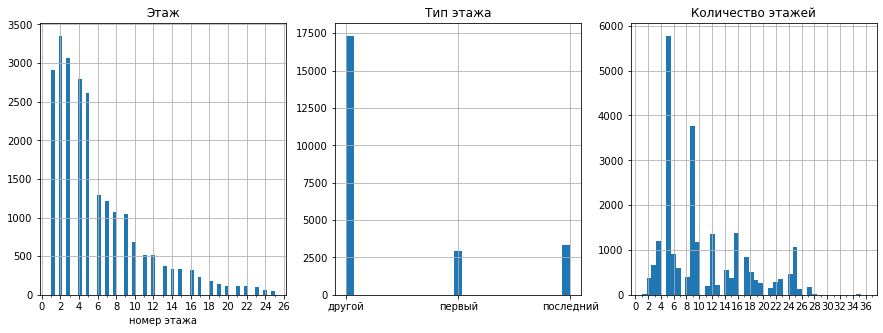

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

ax1.xaxis.set_major_locator(MultipleLocator(2))
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.grid(True)
ax1.set_title('Этаж')
ax1.set_xlabel('номер этажа')
ax1.hist(real_estate['floor'],
         bins='auto',
         range=(1,25));

ax2.grid(True)
ax2.set_title('Тип этажа')
ax2.hist(real_estate['floor_type'],
         bins='auto');

ax3.xaxis.set_major_locator(MultipleLocator(2))
ax3.xaxis.set_minor_locator(AutoMinorLocator(2))
ax3.grid(True)
ax3.set_title('Количество этажей')
ax3.hist(real_estate['floors_total'],
         bins='auto');

*Этаж* (`floor`) — в основном продаются квартиры, находящиеся на этаже не выше 5 (а квартиры на этажах выше 9 встречаются и вовсе редко). Это неудивительно, ведь в Яндекс.Недвижимости представлен вторичный рынок недвижимости, а большая часть «вторички» — это старый жилой фонд, этажность в Петербурге которого составляет обычно 5 или 9 этажей.

*Тип этажа* (`floor_type`) — большая часть продающихся квартир находится не на первом и не на последнем этаже, что является ещё одним свидетельством нормальности нашей совокупности. Интересно, что квартир на последнем этаже продаётся чуть больше, чем на первом.

*Количество этажей* (`floors_total`) — на гистограмме видно несколько пиков, на основании которых можно сделать выводы о типичной этажности жилого фонда в Петербурге и ближайших поселениях-спутниках*. Самый частый вид домов — пятиэтажки, следом за ними по частоте встречаемости идут девятиэтажки. Другие важные группы — 4-этажные, 12-этажные, 16-этажные и 25-этажные дома.

**этажность домов в населённых пунктах, не являющихся ближайшими поселениями-спутниками Петербурга, не имеет большого значения. Это будет продемонстрировано в [конце параграфа](#additional).*

Построим гистограммы по столбцам расстояний (`cityCenters_nearest`, `airports_nearest`, `parks_nearest`):

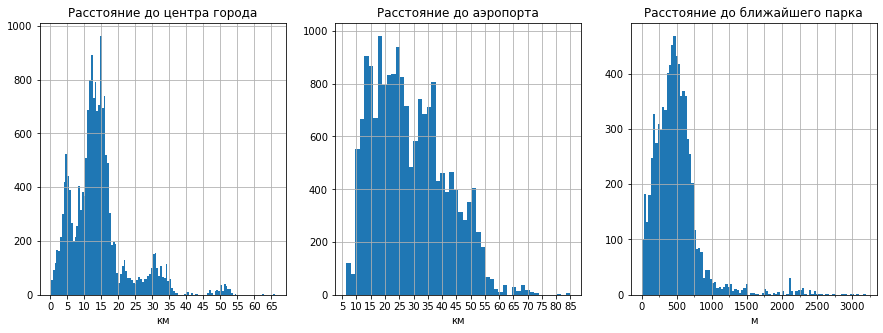

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

ax1.xaxis.set_major_locator(MultipleLocator(5))
ax1.grid(True)
ax1.set_title('Расстояние до центра города')
ax1.set_xlabel('км')
ax1.hist(real_estate['cityCenters_nearest'] / 1000,
         bins='auto');

ax2.xaxis.set_major_locator(MultipleLocator(5))
ax2.grid(True)
ax2.set_title('Расстояние до аэропорта')
ax2.set_xlabel('км')
ax2.hist(real_estate['airports_nearest'] / 1000,
         bins=50);

ax3.xaxis.set_minor_locator(AutoMinorLocator(2))
ax3.grid(True, which='both')
ax3.set_title('Расстояние до ближайшего парка')
ax3.set_xlabel('м')
ax3.hist(real_estate['parks_nearest'],
         bins='auto');

*Расстояние до центра города* (`cityCenters_nearest`) — большая часть продающихся квартир находится на расстоянии не более 20 км от центра города. Заметные на гистограмме пики, вероятно, соответсвуют различным районам жилой застройки.

*Расстояние до аэропорта* (`airports_nearest`) — большинство квартир расположены от аэропорта довольно далеко — от 10 до 55 км. Как-то содержательно интерпретировать пики на гистограмме не представляется возможным.

*Расстояние до ближайшего парка* (`parks_nearest`) — квартиры в основном находятся не дальше, чем в 750 м от ближайшего парка.

Наконец, гистограммы для дня недели и месяца размещения объявления:

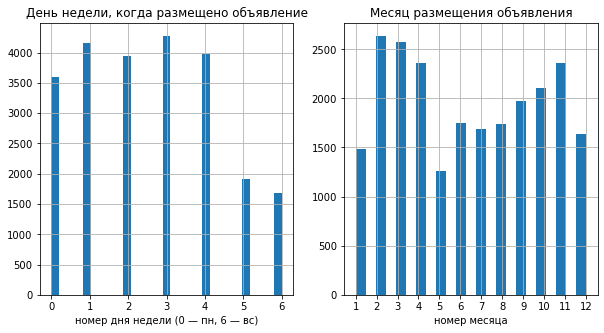

In [36]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.grid(True)
ax1.set_title('День недели, когда размещено объявление')
ax1.set_xlabel('номер дня недели (0 — пн, 6 — вс)')
ax1.hist(real_estate['exposition_since_day_week'],
         bins='auto');

ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.grid(True)
ax2.set_title('Месяц размещения объявления')
ax2.set_xlabel('номер месяца')
ax2.hist(real_estate['exposition_since_month'],
         bins='auto');

*День недели, когда размещено объявление* (`exposition_since_day_week`) — объявления размещают в основном в рабочие дни, причём ближе к её середине. Суббота и воскресенье в этом плане популярностью не пользуются — видимо, на выходных отдыхать хочется больше, чем продавать имущество.

*Месяц размещения объявления* (`exposition_since_month`) — меньшая доля объявлений размещается в январе, мае и декабре. Также летом их делается меньше, чем осенью, и значительно меньше, чем в феврале—апреле. Последний период — самый жаркое время для того, чтобы выйти на рынок вторичной жилой недвижимости. Вероятно, непопулярность января и мая объясняется обилием праздников, когда людям не хочется заниматься продажей недвижимости (по аналогии с выходными). Лето — период отпусков. В чём проблема декабря, не вполне понятно. Возможно, у людей увеличивается нагрузка на работе, т.к. закрывается год, плюс начинается подготовка к Новому году.

**Промежуточный вывод**

Проанализировав построенные выше гистограммы, можно сделать общий вывод, что данные в целом имеют ожидаемое распределение. Закономерности, заслуживающие отдельного упоминания в данном выводе, касаются только момента размещения объявления: чаще всего они размещаются в рабочие дни и в феврале-апреле или осенью. Все остальные закономерности, на наш взгляд, достаточно тривиальны.

*Дополнительный блок о влиянии на рассмотренные выше распределения застройки в поселениях, не являющихся ближайшими спутниками Петербурга*

<a id='additional'></a>
На столбчатой диаграмме ниже показано количество объявлений в 20 населённых пунктах из датафрейма `real_estate` с наибольшим числом объявлений (все остальные поселения собраны в группу «Прочие»):

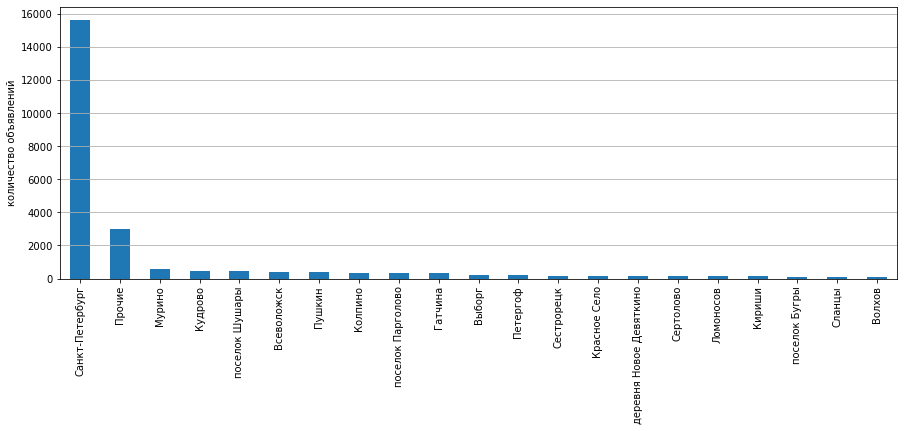

In [37]:
real_estate['locality_in_top30'] = (
    real_estate['locality_name'].where(
        real_estate['locality_name'].isin(
            real_estate
            .pivot_table(index='locality_name', aggfunc='count')
            .sort_values(by='index', ascending=False)[:20].index),
        'Прочие')
    )

(
    real_estate
     .pivot_table(index='locality_in_top30', values='index', aggfunc='count')
     .sort_values(by='index', ascending=False)
     .plot.bar(
         y='index',
         figsize=(15,5),
         legend=False,
         ylabel='количество объявлений',
         xlabel=''
     )
)

plt.gca().grid(True, axis='y')

По диаграмме видно, что подавляющее большинство объявлений относится к Петербургу или его ближайшим поселениям-спутникам (Мурино, Кудрово, Шушары, Всеволожск, Пушкин, Колпино, Парголово, Петергоф, Сестрорецк, Красное Село, Новое Девяткино, Сертолово, Ломоносов). Кроме того, некоторые населённые пункты, оказавшиеся в группе «Прочие», также являются ближайшими спутниками (например, Бугры, Кронштадт, Коммунар, Сосновый Бор, Янино-1, Горелово). Застройка в них в целом такая же, как в основной жилой части Петербурга. Это говорит о том, что влияние характеристик застройки в населённых пунктах, удалённых от Петербурга, пренебрежимо мало.

### Скорость продаж

Посмотрим, насколько быстро продавались квартиры. Для этого построим по столбцу `days_exposition` две гистограммы (для полных данных и с ограничением до 100 дней) и диаграмму «ящик с усами», а также посчитаем некоторые метрики.

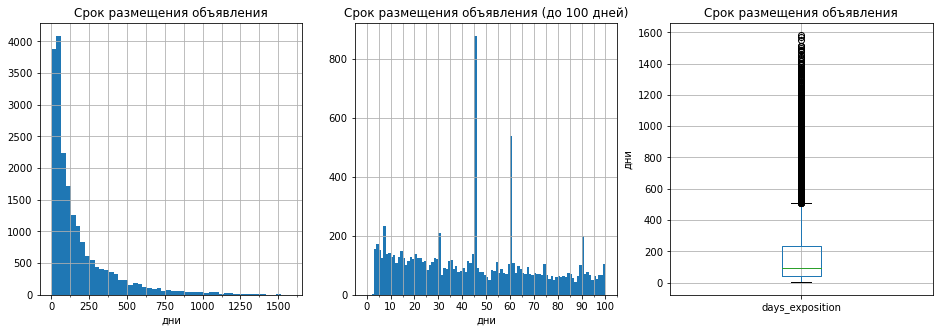

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.grid(True, which='both')
ax1.set_title('Срок размещения объявления')
ax1.set_xlabel('дни')
ax1.hist(real_estate['days_exposition'],
         bins=50);

ax2.xaxis.set_major_locator(MultipleLocator(10))
ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
ax2.grid(True, which='both')
ax2.set_title('Срок размещения объявления (до 100 дней)')
ax2.set_xlabel('дни')
ax2.hist(real_estate['days_exposition'],
         bins=100,
         range=(0,100));

ax3.set_title('Срок размещения объявления')
ax3.set_ylabel('дни')
real_estate.boxplot(column='days_exposition', ax=ax3);

In [39]:
real_estate['days_exposition'].describe()

count    20387.000000
mean       180.772944
std        219.758885
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

По первой гистограмме хорошо видно, что распределение сроков размещения объявления имеет пик в районе 50 дней, а дальше идёт снижение. Основная масса объявлений снимается через примерно 300 дней.

Вторая гистограмма гистограмма говорит о наличии интересной аномалии: на 45 и 60 днях присутствуют огромные пики, а на 7, 30 и 90 днях — пики поменьше. Самый большой пик соответсвует значению в 45 дней.

Почему так? Кажется, дело не в психологии главным образом, тут что-то жёсткое — техническое или юридическое. 

Ответ на этот вопрос нашёлся на странице с [условиями размещения объектов](https://yandex.ru/support/realty/paid.html#paid) на Яндекс Недвижимости. В соотствии с условиями, объявления о продаже квартир стоимостью до 4,5 млн рублей размещаются бесплатно только 45 дней, от 4,5 млн до 10 млн — 60 дней, а от 10 млн — 90 дней. Как раз 3 из 5 наших пики, причём эта версия подтверждается характером распределения цен объектов — основная масса квартир как раз стоит меньше 4,5 млн, квартир дороже 4,5 млн уже меньше, а дороже 10 млн надо ещё поискать.

Правда, такие условия размещения сейчас не применяются в Петербурге и Ленобласти, они касаются только регионов. Однако вполне уместным кажется предположить, что раньше (до мая 2019 года, когда было опубликовано последнее объявление в датасете) они всё же применялись и в Петербурге. Подтверждений этому факту, к сожалению, найти не удалось.

Наверное, такой же логикой можно объяснить небольшие пики напротив 7 и 30 дней — там тоже раньше могли быть какие-то отсечки.

Обычная продажа занимает 95 дней (медиана). Ориентироваться на среднее арифметическое (180,8 дней) в данном случае не стоит из-за большой дисперсии. Аномально долгая продажа по диаграмме «ящик с усами» — это больше 500 дней (выходит за 1,5 межквартильных размаха). Порог аномально быстрой продажи по нему определить невозможно. 

За аномально короткие и аномально длительные сроки размещения объявлений мы примем 10-й и 90-й процентили соответственно. Рассчитаем их значения:

In [40]:
print('10-й процентиль:', real_estate['days_exposition'].quantile(0.1), 'дней')
print('90-й процентиль:', real_estate['days_exposition'].quantile(0.9), 'дней')

10-й процентиль: 17.0 дней
90-й процентиль: 460.0 дней


Получается, что аномально быстрые продажи — это все, которые осуществляются быстрее, чем за 17 дней, а аномально долгие — те, которые совершаются через более чем 460 дней после размещения объявления. Просто быстрыми продажами можно считать все продажи, срок которых от 17 до 45 дней (от 10-го процентиля до первого квартиля). А долгими продажами будем считать те, которые совершаются в период между 231 и 460 днями (от третьего квартиля до 90-го процентиля) после размещения объявления. 

### Факторы цены

По заданию необходимо выяснить, зависит ли цена от:

* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).

Для этого построим необходимые диаграммы. В случае с площадью мы будем строить диаграммы рассеяния, а для всех остальных столбцов построим столбчатые диаграммы по медианным ценам. Для площадей также посчитаем коэффициенты корреляции Пирсона.

Такой выбор типов графиков связан с тем, что множество значений площади можно условно считать непрерывным, тогда как множества количества комнат, типов этажа и дат размещения объявления носит дискретный характер. По этой причине для них диаграмма рассеяния не даст нужной информации. Мы будем будем характеризовать соответствующую им цену объекта при помощи типичного значения — медианы.

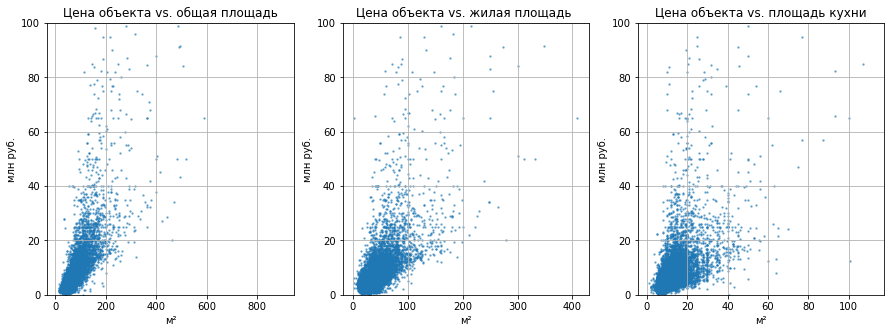

In [41]:
cols_to_x_area = {
    'total_area': 'Цена объекта vs. общая площадь',
    'living_area': 'Цена объекта vs. жилая площадь ',
    'kitchen_area': 'Цена объекта vs. площадь кухни'
}

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

column = 0

for col in cols_to_x_area:
    ax[column].set_title(cols_to_x_area[col])
    ax[column].grid(True)
    ax[column].set_ylabel('млн руб.')
    ax[column].scatter(real_estate[col], real_estate['last_price_mln'], s=2, alpha=0.5)
    ax[column].set_xlabel('м²')
    ax[column].set_ylim(0, 100)
    column += 1

In [42]:
print('Коэффициенты корреляции Пирсона для значений цены и соответствующего столбца:')
real_estate[['last_price', 'total_area', 'living_area', 'kitchen_area']].corr().loc['total_area':, 'last_price']

Коэффициенты корреляции Пирсона для значений цены и соответствующего столбца:


total_area      0.653679
living_area     0.566440
kitchen_area    0.520376
Name: last_price, dtype: float64

Диаграммы показывают наличие положительной зависимости цены квартиры от площади (по крайней мере до перехода через определённый порог площади). Зависимость от общей площади самая сильная, а от площади кухни — самая слабая (возможно, зависимости нет, а скорее присутствует влияние других факторов — так, по мере увеличения жилой площади квартиры кухня тоже обычно возрастает, поэтому рост цены, вызванный ростом жилой площади, коррелирует с увеличением площади кухни).

Коэффициенты корреляции Пирсона подтверждают наши выводы о том, что существует [средняя](https://tocodata.com/marketing/korrelyaciya.html) по силе корреляция между общей площадью и ценой. Корреляция между площадью кухни и ценой слабее, но тоже может считаться средней.

Зависимость цены от общей и жилой площади в целом носит линейный характер. Утверждать это о зависимости от площади кухни с той же уверенностью нельзя. 

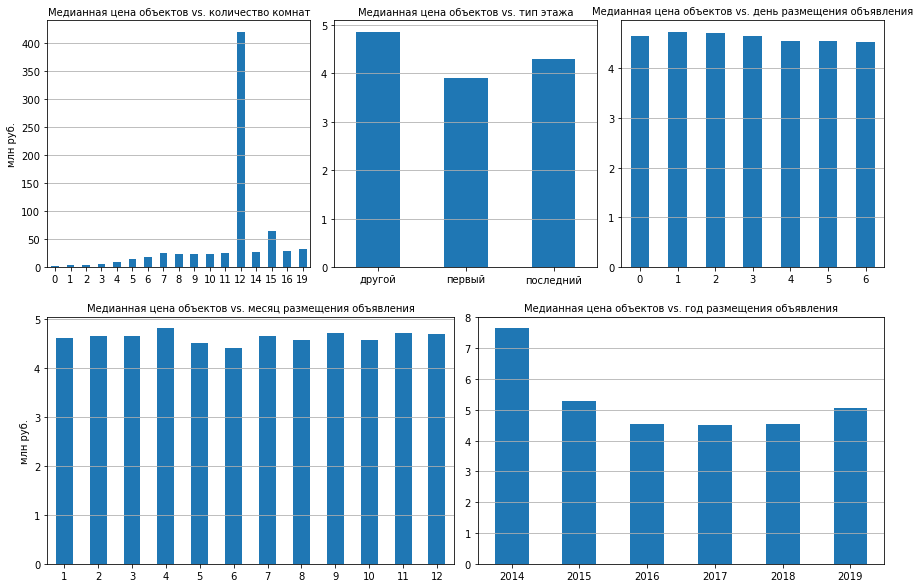

In [43]:
cols_to_x_other = {
    'rooms': 'Медианная цена объектов vs. количество комнат',
    'floor_type': 'Медианная цена объектов vs. тип этажа',
    'exposition_since_day_week': 'Медианная цена объектов vs. день размещения объявления',
    'exposition_since_month': 'Медианная цена объектов vs. месяц размещения объявления',
    'exposition_since_year': 'Медианная цена объектов vs. год размещения объявления'
}

gridsize = (2, 6)

fig = plt.figure(figsize=(15, 10))

ax1 = plt.subplot2grid(gridsize,(0, 0), colspan=2)
ax2 = plt.subplot2grid(gridsize,(0, 2), colspan=2)
ax3 = plt.subplot2grid(gridsize,(0, 4), colspan=2)
ax4 = plt.subplot2grid(gridsize,(1, 0), colspan=3)
ax5 = plt.subplot2grid(gridsize,(1, 3), colspan=3)

ax = [ax1, ax2, ax3, ax4, ax5]

i = 0

for col in cols_to_x_other:
    ax[i].set_title(cols_to_x_other[col], fontsize=10)
    if i in [0,3]:
        ax[i].set_ylabel('млн руб.')   
    real_estate.groupby(col).median().plot.bar(y='last_price_mln', ax=ax[i], rot=0, legend=None)
    ax[i].xaxis.label.set_visible(False)
    ax[i].grid(True, axis='y')
    i += 1

По диаграммам можно сделать следующие выводы:

*Цена vs. количество комнат* — положительная зависимость цены от количества комнат сохраняется примерно до того момента, пока количество комнат не превышает 7. После этого зависимость не столь однозначная. Вероятно, это связано с недостаточным размером выборки квартир, в которых необычно большое число комнат. Также, возможно, с какого-то момента большую роль начинают играть прочие факторы (расстояние до центра, этажность дома и т.д.). Огромное медианное значение цены для 12-комнатных квартир связано с тем, что в датасете есть только одна такая квартира, и её цена больше 400 млн руб.

*Цена vs. тип этажа* — самые дорогие этажи — не первые и не последние. Первые же в основном самые дешёвые. Впрочем, эта зависимость не очень ярко выражена.

*Цена vs. день недели размещения объявления* — зависимости цены от дня недели не прослеживается.

*Цена vs. месяц размещения объявления* — явной зависимости цены от месяца размещения объявления не прослеживается.

*Цена vs. год размещения объявления* — в 2014 году медианная цена была самой высокой, а затем она начала снижаться. Повышение наметилось лишь в 2019 году. Говорить о существовании зависимости цены от года как такового нельзя, скорее тут сказываются неучтённые факторы, «скрытые» в годе.

Остановимся поподробнее на последнем наблюдении. Попробуем выяснить, что было драйвером снижения медианной стоимости объектов с 2014 по 2018 год: динамика цена за квадратный метр или площади продаваемых квартир. Для этого построим столбчатые диаграммы, в которых представим динамику этих двух показателей:

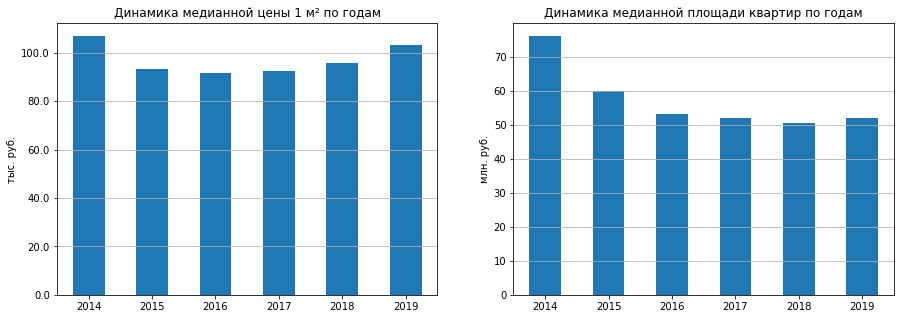

In [44]:
from matplotlib.ticker import FuncFormatter

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax1.set_title('Динамика медианной цены 1 м² по годам')
ax1.set_ylabel('тыс. руб.')
(real_estate
 .groupby('exposition_since_year')
 .median()
 .plot.bar(y='square_meter_price', ax=ax1, rot=0, legend=None)
)
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: x / 1000))
ax1.grid(True, axis='y')
ax1.xaxis.label.set_visible(False)


ax2.set_title('Динамика медианной площади квартир по годам')
ax2.set_ylabel('млн. руб.')
(real_estate
 .groupby('exposition_since_year')
 .median()
 .plot.bar(y='total_area', ax=ax2, rot=0, legend=None)
)
ax2.grid(True, axis='y')
ax2.xaxis.label.set_visible(False)

Судя по диаграммам, главную роль в снижении медианной стоимости объектов сыграло уменьшение площади продаваемых квартир. Она падала более резко, чем цена квадратного метра, к тому же последняя начала восстанавливаться уже в 2018 году.

Причин уменьшения площади продаваемых квартир может быть несколько, но основная, скорее всего, состоит в снижения располагаемых доходов населения с 2014 года. Этот период характеризовался кризисными, стагнационными тенденциями в российской экономике, что негативно сказывалось на уровне благосостояния граждан. А чем ниже благосостояние, тем меньшую площадь квартир может позволить себе семья. 

### Средняя цена за квадратный метр 

По заданию необходимо выделить 10 населённых пунктов с самым большим количеством объявлений и найти среднюю стоимости квадратного метра в них. Сделаем это:

In [45]:
locality_names_top10 = (
                        real_estate
                            .pivot_table(index='locality_name', values='index', aggfunc='count')
                            .sort_values(by='index', ascending=False)[:10]
                            .index
                       )

square_meter_price_mean = {}

for locality in locality_names_top10:
    square_meter_price_mean[locality] = (
                                        real_estate
                                             .query('locality_name == @locality')['square_meter_price']
                                             .mean()
                                        )
    
square_meter_prices = (
    pd.DataFrame(
        square_meter_price_mean.values(),
        square_meter_price_mean.keys(),
        columns=['mean_price']
    )
    .sort_values(by='mean_price', ascending=False))

square_meter_prices

,mean_price
Санкт-Петербург,114834.464352
Пушкин,103125.819291
Кудрово,95260.846171
поселок Парголово,90175.913458
Мурино,86041.116064
поселок Шушары,78551.344545
Колпино,75424.579098
Гатчина,68746.146763
Всеволожск,68654.473986
Выборг,58141.909153


В топ-10 городов по числу объявлений самая высокая цена за квадратный метр, ожидаемо, в Петербурге (почти 115 тыс. руб. за м²), а самая низкая — в Выборге (около 58 тыс. руб. за м²).

### Цена одного километра расстояния до центра

Найдём среднюю цену одного километра расстояния до центра в Петербурге, для чего сначала вычислим цену одного километра для каждого объявления (столбец `km_price`), а потом рассчитаем их среднее по группам. Группы выделим на основании гистограммы, характеризующей распределение расстояний до центра, и отметим их в столбце `distance_group`. Учтём, что жилая застройка, находящаяся на расстоянии больше 30 км от центра Петербурга, находится уже не на его территории.

In [46]:
real_estate['distance_group'] = pd.cut(
    real_estate['cityCenters_nearest_km'],
    [0, 5, 10, 15, 20, 30],
    right=False,
    labels=['0–5 км', '5–10 км', '10–15 км', '15–20 км', '20–30 км']
    )

real_estate['km_price'] = (
    real_estate
    .query('cityCenters_nearest_km != 0')['last_price']
    / real_estate['cityCenters_nearest_km']
    )

(
    real_estate
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='distance_group', values='km_price')
    .style.format({'km_price': lambda x: str(round(x / 1000, 1)) + ' тыс. руб.'})
)

,km_price
distance_group,
0–5 км,6768.0 тыс. руб.
5–10 км,2010.0 тыс. руб.
10–15 км,498.5 тыс. руб.
15–20 км,345.9 тыс. руб.
20–30 км,232.8 тыс. руб.


По приведённой сводной таблице можно сделать достаточно очевидный вывод: средняя цена одного километра самая высокая у квартир, расположенных вблизи центра, и снижается по мере удаления от центра.

Можно провести более детальный анализ, рассчитав среднюю цену буквально для каждого километра и построив столбчатую диаграмму. Сделаем это:

,km_price
cityCenters_nearest_km,
1.0,21206.7 тыс. руб.
2.0,8894.2 тыс. руб.
3.0,3712.5 тыс. руб.
4.0,3326.1 тыс. руб.
5.0,2891.2 тыс. руб.
6.0,2556.4 тыс. руб.
7.0,2110.7 тыс. руб.
8.0,1242.6 тыс. руб.
9.0,773.0 тыс. руб.


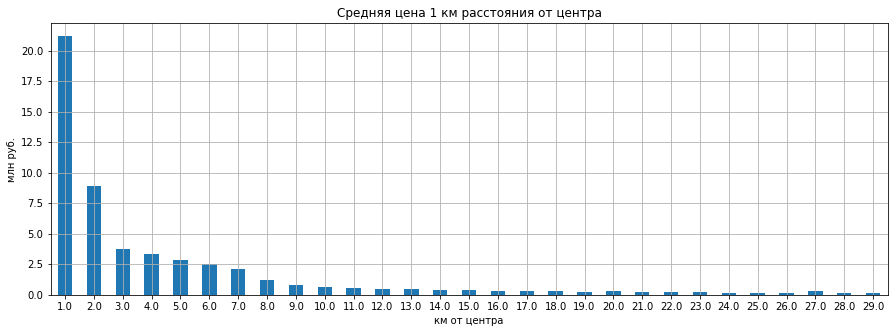

In [47]:
display(
    real_estate
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='km_price')
    .style.format({'km_price': lambda x: str(round(x / 1000, 1)) + ' тыс. руб.'})
    .set_caption('Средняя цена 1 км расстояния от центра')
    .set_table_styles([{
        'selector': 'caption',
        'props': [
            ('color', 'black'),
            ('font-size', '15px'),
            ("text-align", "center")
        ]
}])
    )

(
    real_estate
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='km_price')
    .plot.bar(
        y='km_price',
        rot=0,
        legend=None,
        title='Средняя цена 1 км расстояния от центра',
        ylabel='млн руб.',
        xlabel='км от центра',
        figsize=(15,5),
        grid=True
    )
)


plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: x / 1000000))

Судя по диаграмме, снижение цены одного километра по мере удаления идёт сначала резко, а затем, в районе 3 км от центра, становится более плавным.

## Общий вывод

В ходе работы над проектом были выполнены следующие **действия**:

1. Проведено предобработка данных: сокращено количество пропусков, изменены типы данных в трёх столбцах, исключены неявные дубликаты в столбце с наименованием населённого пункта, устранены артефакты (аномально большие и малые значения) в трёх столбцах.


2. Добавлены столбцы с данными о цене квадратного метра, расстояния до центра города в километрах, типе этажа, дне недели, месяце и годе публикации, а также некоторые другие столбцы.


3. Проведён исследовательский анализ данных с использованием преимущественно графических методов, его результаты раскрыты ниже.


Целью проекта было выявление **особенностей и закономерностей** рынка жилой недвижимости в Санкт-Петербурге и окрестностях. Выделим ключевые среди них:

* типичная продаваемая в Петербурге квартира —  однушка или двушка площадью в районе 30—50 м² по цене 3,5–4 млн руб.; она находится на 2–8 этаже пяти- или девятиэтажного здания, расположенного в 10-15 км от центра города; в пешей доступности (750 м) обычно есть парк;


* объявления о продаже недвижимости размещаются наиболее активно в рабочие дни в феврале-апреле и осенью, а в январе, мае и летом наблюдается относительное затишье;


* продаются квартиры в основном в течение 250 дней после размещения объявления, медианное время продажи — 95 дней; значительная часть объявлений снимается на 45 и 60 день после публикации, т.к. истекает срок их бесплатного размещения.


* на цену оказывают влияние такие факторы, как общая и жилая площадь квартиры (также, возможно, площадь кухни), количество комнат и тип этажа (первый, последний, другой); зависимость от площади и количества комнат положительная;


* средняя цена за квадратный метр самая высокая в Петербурге (почти 115 тыс. руб. за м²), а самая низкая (среди поселений, попадающих в топ-10 по числу объявлений) — в Выборге (около 58 тыс. руб. за м²).


* цена одного километра расстояния от центра снижается по мере удаления от центра.

**Рекомендации:**

* уточнить причины и устранить пропуски в картографических данных;


* возможно, усовершенствовать ввод пользовательских данных (например, сделать выпадающее меню с типичной высотой потолка для разных типов построек или отфильтровать очевидные дубликаты в перечне населённых пунктов);


* учесть данные о рынке вторичной жилой недвижимости в Санкт-Петербурге при разработке региональной маркетинговой стратегии сервисов Яндекса (например, Яндекс Услуг).